## PROJECT - (04th Dec, 2020 - 13th Dec, 2020) 

In [1]:
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from surprise import KNNWithMeans    # Importing KNN means library
from surprise.model_selection.split import train_test_split      # Splitting data into train and test set
from surprise import SVD    # Importing SVD library
from collections import defaultdict       # Importing defaultdict from surprise library
from surprise import accuracy         # Importing accuracy score 
from surprise import Dataset, Reader      # Importing dataset & reader from surprise library  
from surprise.model_selection import cross_validate        # Importing cross validation score
from surprise.model_selection import GridSearchCV     # Importing grid search cv library

### 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
col_name = ['userid', 'productid', 'rating', 'timestamp']        # Renaming columns

df = pd.read_csv('ratings_Electronics.csv', names = col_name)    # Loading dataset

In [3]:
df.head()

,userid,productid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
df.tail()

,userid,productid,rating,timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [5]:
df.shape

(7824482, 4)

In [6]:
df.size

31297928

In [7]:
df.isnull().sum()

userid       0
productid    0
rating       0
timestamp    0
dtype: int64

We can observe that there are no null / missing values in the dataset

In [8]:
df.count()

userid       7824482
productid    7824482
rating       7824482
timestamp    7824482
dtype: int64

In [9]:
df.dtypes

userid        object
productid     object
rating       float64
timestamp      int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userid     object 
 1   productid  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [12]:
df.skew()

rating      -1.205397
timestamp   -1.921830
dtype: float64

### Exploratory Data Analysis

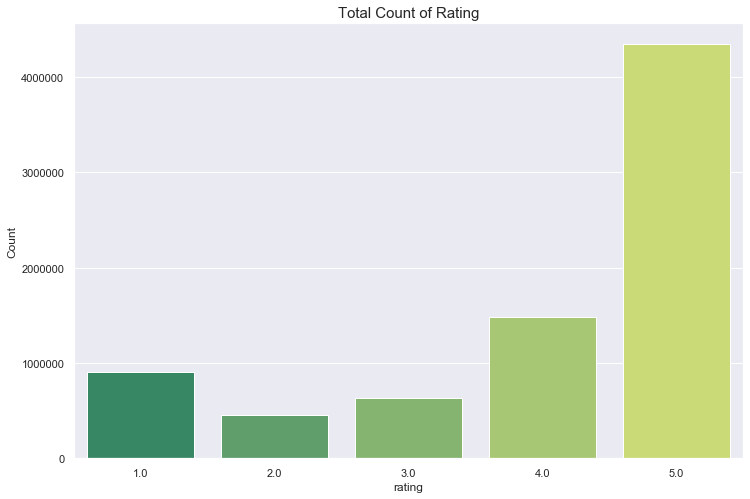

In [13]:
# Visual analysis of the rating column

plt.figure(figsize = (12,8))
sns.countplot(x = 'rating', data = df, palette = 'summer')
plt.xlabel('rating', fontsize = 12)
plt.ylabel('Count', fontsize = 12 )
plt.title ('Total Count of Rating', fontsize = 15)
plt.show()

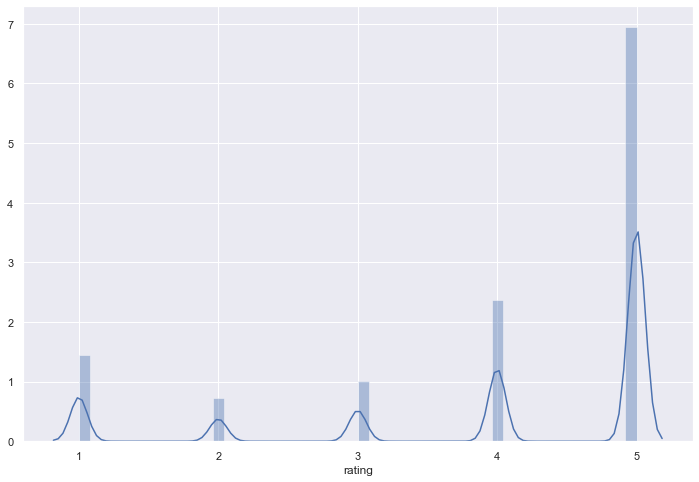

In [14]:
plt.figure(figsize = (12,8))
sns.distplot(df['rating'], kde = True);

Let's explore the rating groups:

From the histogram we can observe the five groups of ratings.

1. Looks like our users have given the top rating 5 for good products.

2. Ratings 1,2,3 have a similiar trend among users, whereas rating 4 is slighly higher.

3. User Group 1,2,3 is normally distributed with a smooth peak, whereas for groups 4 & 5 the peaks are sharp.

In [15]:
df1 = pd.DataFrame({'Number of Ratings' : df.groupby('productid').count()['rating'], 'Mean Ratings' : df.groupby('productid').mean()['rating']})

In [16]:
df1.head()

,Number of Ratings,Mean Ratings
productid,,
0132793040,1,5.000000
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852


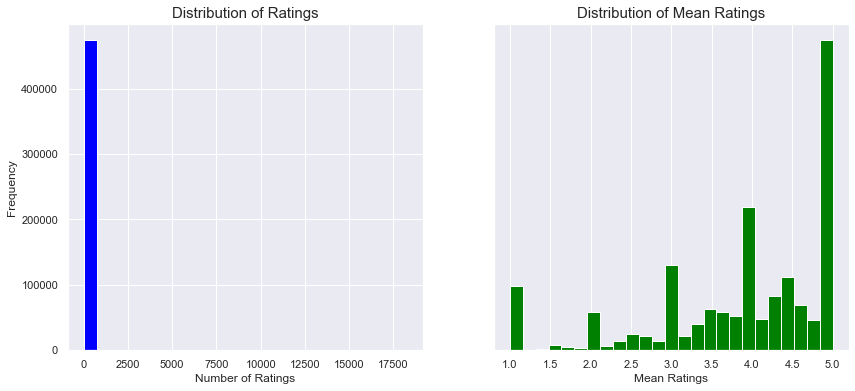

In [17]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.hist(x = 'Number of Ratings', data = df1, bins = 25, color = 'blue')
plt.xlabel('Number of Ratings', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 15)

plt.subplot(1,2,2)
plt.hist(x = 'Mean Ratings', data = df1, bins = 25, color = 'green')
plt.title('Distribution of Mean Ratings', fontsize = 15)
plt.xlabel('Mean Ratings', fontsize = 12)
plt.yticks([])
plt.show();

From these histograms we can see that most of the number of ratings are between (0 and 1900), and most of the products have a mean rating of '5'.

<Figure size 864x432 with 0 Axes>

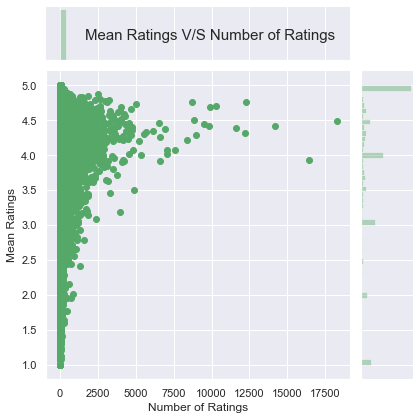

In [18]:
# Creating a scatter plot to observe relationship between (Number of Ratings & Mean Ratings)

plt.figure(figsize = (12,6))
sns.jointplot(x = 'Number of Ratings', y = 'Mean Ratings', data = df1, color = 'g', height = 6)
plt.suptitle('Mean Ratings V/S Number of Ratings',fontsize = 15, y = 0.92);

plt.show()

In [19]:
rt_gp_user = df.groupby('userid')['rating'].count()
rt_gp_product = df.groupby('productid')['rating'].count()
most_occured_product = df['productid'].value_counts().idxmax()
most_freq_user = df['userid'].value_counts().idxmax()

In [20]:
print("The Max number of ratings we have received for a single product is : {} & the product ID that has received is : {}".format(rt_gp_product.max(), most_occured_product))
print()
print('The User : {} has given max number of ratings across products with number of ratings being :{}'. format(most_freq_user, rt_gp_user.max()))

The Max number of ratings we have received for a single product is : 18244 & the product ID that has received is : B0074BW614

The User : A5JLAU2ARJ0BO has given max number of ratings across products with number of ratings being :520


### 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [21]:
df2 = df.join(df.groupby('userid')['rating'].count(), on = 'userid', rsuffix = '_user_count')

In [22]:
df2.head()

,userid,productid,rating,timestamp,rating_user_count
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,4
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1


Now, Lets try to make a subset of data. Though we have a large dataset, lets consider ratings provided by user who have rated more than 50 products. The reason being :

1. We may not be able to understand or rely on a user rating with fewer number of representation from the user. For example, if a product has received only a single rating or a user has rated only one product it doesn't give us any variety.


2. Memory consideration, for techinques like Matrix factorization,SVD, collaborative filtering methods it becomes compuationally complex with the local machines on a high volume dataset.


3. I am creating a function subset , which will count the number of ratings provided by each user and will calssify a user as if he has rated more than 50 ratings or rated less than 50 ratings in a column called Group

In [23]:
def subset(row):
    if row['rating_user_count'] >50 :
        return "Rated More Than 50"
    
    else:
        return "Rated Less Than 50"
df2['Group'] = df2.apply(subset, axis = 1)

In [24]:
df.head()

,userid,productid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [25]:
user_more_than_50 = df2[df2['Group'] == 'Rated More Than 50']
user_less_than_50 = df2[df2['Group'] == 'Rated Less Than 50']
A = user_more_than_50['Group'].count()
B = user_less_than_50['Group'].count()

print('Number of users who have more than 50 rating : {}'.format(user_more_than_50['Group'].count()))
print()
print('Number of users who have less than 50 rating : {}'. format(user_less_than_50['Group'].count()))
print()

sub_per = (A/(A+B))*100
print('Our subset is just : {}% of our total data. However it gives us the data density required with total number of records : {}'. format(sub_per, A))

Number of users who have more than 50 rating : 122171

Number of users who have less than 50 rating : 7702311

Our subset is just : 1.5613940961203565% of our total data. However it gives us the data density required with total number of records : 122171


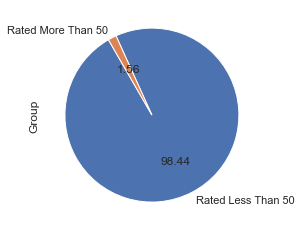

In [26]:
# Visual analysis through pie chart of users rating more than 50 products & less than 50

df2['Group'].value_counts().plot.pie(shadow = False, startangle = 120, autopct = '%.2f');

From the above analysis we can observe that users who have rated more than 50 products consitute (1.56%) of our data. Whereas users who have rated less than 50 products consitute (98.44%) of our data.

Now since we are only looking to keep a particular subset of our data, let us consider users who have rated more than (50 products) from here on for our further analysis.

In [27]:
subset = df2[df2['Group'] == 'Rated More Than 50']

In [28]:
subset.shape

(122171, 6)

In [29]:
subset.size

733026

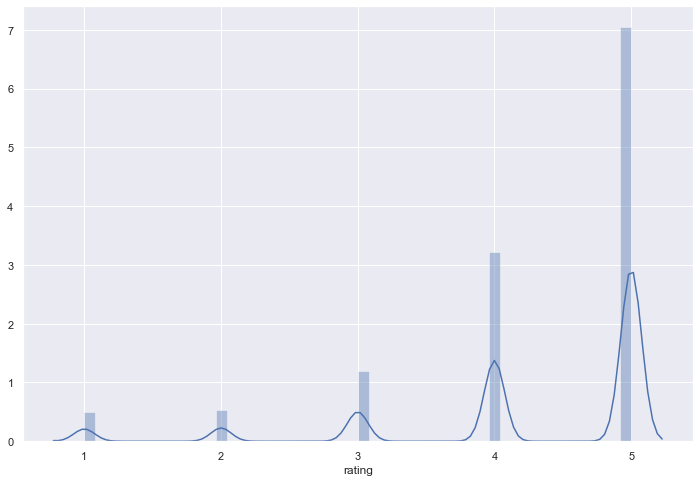

In [30]:
plt.figure(figsize = (12,8))
sns.distplot(subset['rating']);

We can now observe the subset dataset contains 122171 rows of unique users who have given morethan 50 ratings.

The below distplot shows the distribution of our subset.

If we compare the distribution of original data vs subset, we could see that the distributions are similar for user groups who have rated 4 & 5. Whereas the distribution for ratings 1,2,3 have slightly changed and the peaks looks flat and smooth.

This is due to change in the data both in volume and values.

In [31]:
subset_with_number_of_ratings = subset.join(subset.groupby('productid')['rating'].count(), on = 'productid', rsuffix = '_product_count')

In [32]:
subset_with_number_of_ratings.head()

,userid,productid,rating,timestamp,rating_user_count,Group,rating_product_count
118,AT09WGFUM934H,0594481813,3.0,1377907200,110,Rated More Than 50,1
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600,72,Rated More Than 50,2
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000,151,Rated More Than 50,2
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,58,Rated More Than 50,3
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000,163,Rated More Than 50,3


Now , I am adding one more column "ratings_product_count" this will give the count of how many ratings the specific product ID has given.

In popularity based recommendation , we will use this detail to give more insights to the user about the product.

How to read the above dataframe?

The product (0594481813) has a rating of 3.0 and has received only one rating by a user (AT09WGFUM934H) who has rated 110 other products in our subset.

### 3. Build Popularity Recommender Model.

In [33]:
popularity_based_recommendation = subset_with_number_of_ratings.drop(['userid','Group'],axis = 1)

In [34]:
popularity_based_recommendation.shape

(122171, 5)

In [35]:
# Popularity based on user ratings and number of ratings received by each product

PRS_product_rated_count = pd.DataFrame(popularity_based_recommendation.groupby('productid')['rating','rating_product_count'].mean().sort_values(by = 'rating_product_count', ascending = False))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# The top 10 based on the number of ratings the product has received.

PRS_product_rated_count.head(10)

,rating,rating_product_count
productid,,
B0088CJT4U,4.215686,204
B003ES5ZUU,4.858757,177
B000N99BBC,4.773006,163
B007WTAJTO,4.692308,156
B00829TIEK,4.431507,146
B008DWCRQW,4.088889,135
B00829THK0,4.409091,132
B002R5AM7C,4.118110,127
B004CLYEDC,4.666667,117


I have now created a dataframe that lists the products, its ratings and how many ratings the product has received and sorted based on number of "ratings received".

In [37]:
# Popularity based on user rating

PRS_by_rating = pd.DataFrame(popularity_based_recommendation.groupby('productid')['rating', 'rating_product_count'].mean().sort_values(by = 'rating', ascending = False))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# The top 10 products based on top ratings received by the product.

PRS_by_rating.head(10)

,rating,rating_product_count
productid,,
B00LKG1MC8,5.0,1
B001UE6HZ2,5.0,1
B001UKJ8FC,5.0,1
B001UK6UO4,5.0,1
B0082N9DGY,5.0,1
B0082N9E9U,5.0,1
B001UJJNNA,5.0,1
B001UIPV28,5.0,1
B001UIHAOK,5.0,1


I have now created a dataframe that lists the products, sorted based on rating, how many ratings the product has received and sorted based on "user ratings".

Both the above tables give the user top rated products. The "table 2" though shows the products which have been rated the best but the number of ratings it has received is just 1.

However the "table 1" gives more credibility as it recommends the products based on number of users who have rated the product and not just products that have just been rated high

In [39]:
data =  pd.DataFrame(subset.groupby('productid')['rating'].value_counts().unstack().fillna(0))

In [40]:
data

rating,1.0,2.0,3.0,4.0,5.0
productid,,,,,
0594481813,0.0,0.0,1.0,0.0,0.0
0970407998,1.0,0.0,0.0,1.0,0.0
0972683275,0.0,0.0,0.0,0.0,3.0
1400501466,2.0,0.0,1.0,0.0,2.0
1400501520,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
B00LED02VY,0.0,0.0,0.0,1.0,0.0
B00LGN7Y3G,0.0,0.0,0.0,0.0,1.0
B00LGQ6HL8,0.0,0.0,0.0,0.0,5.0


Rating count for each scale:

Now let us further try to enhance the Table 1 with recommendations to users, with how many ratings that have been given by users for each product on a scale of 1 to 5 along with "product rating" & "product rating count".

In [41]:
popularity_final = pd.merge(PRS_product_rated_count, data, on = 'productid')

In [42]:
popularity_final.nlargest(15,'rating_product_count')

,rating,rating_product_count,1.0,2.0,3.0,4.0,5.0
productid,,,,,,,
B0088CJT4U,4.215686,204,2.0,8.0,24.0,80.0,90.0
B003ES5ZUU,4.858757,177,0.0,2.0,2.0,15.0,158.0
B000N99BBC,4.773006,163,0.0,0.0,5.0,27.0,131.0
B007WTAJTO,4.692308,156,5.0,1.0,3.0,19.0,128.0
B00829TIEK,4.431507,146,4.0,3.0,4.0,50.0,85.0
B008DWCRQW,4.088889,135,4.0,5.0,18.0,56.0,52.0
B00829THK0,4.409091,132,3.0,5.0,5.0,41.0,78.0
B002R5AM7C,4.118110,127,1.0,3.0,23.0,53.0,47.0
B004CLYEDC,4.666667,117,0.0,0.0,3.0,33.0,81.0


So, above is the popularity based recommendation that we have created and I am highlighting the top 15 products, that are popular among users, along with average rating, number of ratings the products have received, and its splitup on number of rating for each scale between 1 to 5.

### 4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio)

### 5. Build Collaborative Filtering model.

In [43]:
subset

,userid,productid,rating,timestamp,rating_user_count,Group
118,AT09WGFUM934H,0594481813,3.0,1377907200,110,Rated More Than 50
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600,72,Rated More Than 50
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000,151,Rated More Than 50
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,58,Rated More Than 50
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000,163,Rated More Than 50
...,...,...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600,197,Rated More Than 50
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600,238,Rated More Than 50
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000,257,Rated More Than 50
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600,238,Rated More Than 50


In [44]:
reader = Reader(rating_scale = (1.0, 5.0))

In [45]:
cf = Dataset.load_from_df(subset[['productid','userid','rating']], reader)

In [46]:
cf

### Split the data randomly into a train and test dataset

Note that I am using train_test_split from surprise package and not from sklearn , so there will be a slight change in syntax

In [47]:
x,y = train_test_split(cf, test_size = 0.30)    # Splitting data into train & test set

In [48]:
model = SVD()
model.fit(x)      # Fitting model

In [49]:
prediction = model.test(y)

In [50]:
prediction

[Prediction(uid='B00A81ICCE', iid='AWPODHOB4GFWL', r_ui=5.0, est=4.363659153768635, details={'was_impossible': False}),
 Prediction(uid='B0001XAJ6Q', iid='A2CL818RN52NWN', r_ui=5.0, est=4.56681310377764, details={'was_impossible': False}),
 Prediction(uid='B00JBUI6FQ', iid='A2NYK9KWFMJV4Y', r_ui=5.0, est=4.757878993818433, details={'was_impossible': False}),
 Prediction(uid='B00313JXE2', iid='A3U5HKDHPYBAK3', r_ui=3.0, est=4.041832128748179, details={'was_impossible': False}),
 Prediction(uid='B00EMHVVNM', iid='A1E3OB6QMBKRYZ', r_ui=4.0, est=3.8515398372028056, details={'was_impossible': False}),
 Prediction(uid='B002ZV8FQI', iid='A12DQZKRKTNF5E', r_ui=5.0, est=4.006596351414242, details={'was_impossible': False}),
 Prediction(uid='B004ZMVQRA', iid='A12DQZKRKTNF5E', r_ui=4.0, est=3.988611244423108, details={'was_impossible': False}),
 Prediction(uid='B005NCNE62', iid='A34CSXOGVYF94S', r_ui=5.0, est=4.579427157024933, details={'was_impossible': False}),
 Prediction(uid='B00B99JU5M', iid

For each user (uid), for the product (iid) our model has given the actual rating(r_ui) and the predicted rating (est) the user will give for the product.

If (was_impossible = False) that denotes the algorithm was able predict the user rating. If (was_impossible = True) then it means that the algorithm was not able to predict the rating. This may generally happen if the user does not has any rating provided for any of the products which is also known as the "cold start problem".



In [51]:
def get_top_n(prediction, n = 5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in prediction:
        top_n[uid].append((iid, est))
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x : x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

In [52]:
top_n = get_top_n(prediction, n = 5)

In [53]:
top_n

defaultdict(list,
            {'B00A81ICCE': [('A1A535TCGNMVPI', 4.486020865679615),
              ('AWPODHOB4GFWL', 4.363659153768635),
              ('A1H7Y5XKPGT0OS', 4.098268006094022),
              ('A3N0P5AAMP6XD2', 3.6370503445176543)],
             'B0001XAJ6Q': [('A2CL818RN52NWN', 4.56681310377764)],
             'B00JBUI6FQ': [('A2NYK9KWFMJV4Y', 4.757878993818433)],
             'B00313JXE2': [('A3U5HKDHPYBAK3', 4.041832128748179)],
             'B00EMHVVNM': [('A1KDUQ2HU0WD68', 4.444305879771848),
              ('ACQYIC13JXAOI', 4.37471460375424),
              ('A3R1WFO4KIUQXZ', 4.327592399301968),
              ('AE88D7OM7YU99', 4.114090210402172),
              ('A2JKM8KF3296CW', 4.077375645238251)],
             'B002ZV8FQI': [('A12DQZKRKTNF5E', 4.006596351414242)],
             'B004ZMVQRA': [('A12DQZKRKTNF5E', 3.988611244423108),
              ('A1G5MI2KREPEIB', 3.8817719432713487),
              ('A1AWL9JASMG904', 3.4653172064839426)],
             'B005NCNE62': [('A

In [54]:
print("The Root Mean Square Error for the Matrix Factorization using SVD:{}".format(accuracy.rmse(prediction, verbose = False)))
print()
print("The Mean Absolute Error for the Matrix Factorization using SVD:{}".format(accuracy.mae(prediction, verbose = False)))

The Root Mean Square Error for the Matrix Factorization using SVD:0.9791357705344744

The Mean Absolute Error for the Matrix Factorization using SVD:0.7268020455391918


### A. Collaborative Filtering Using KNNwithMeans

### Grid Search CV

In [55]:
model = Dataset.load_from_df(subset[['userid','productid','rating']], reader)

In [56]:
trainset, testset = train_test_split(model, test_size = 0.20)

In [57]:
parm_grid = {'k' :[50,60,70], 'name' :['cosine', 'pearson_baseline'], 'user_based' : [True, False]}

grid = GridSearchCV(KNNWithMeans, parm_grid, cv = 3, measures = ['rmse','mae'])

In [58]:
grid.fit(model)     # Fitting model

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [59]:
grid.best_params['rmse']

{'k': 60, 'name': 'cosine', 'user_based': True}

In [60]:
grid.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x1a3dd04810>,
 'mae': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x1a3dd04f50>}

In [61]:
grid.best_score

{'rmse': 1.0638183345782373, 'mae': 0.7710546993097364}

### KNN User - User Similarity

In [62]:
cfuus = KNNWithMeans(k = 60, sim_options = {'name' : 'cosine', 'min_support' : 5, 'user_based' : True, 'k' : 5}, verbose = True, cv = 3)

In [63]:
cfuus.fit(trainset)     # Fitting model on train set

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [66]:
pred = cfuus.test(testset)    # Fitting on test data

In [67]:
pred

[Prediction(uid='A5JLAU2ARJ0BO', iid='B0000UXH5A', r_ui=5.0, est=4.261981255627404, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A17NVM7IAPF2NS', iid='B00IVPU6GO', r_ui=5.0, est=4.392156862745098, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3HR0ZZOFKQ97N', iid='B008X1BVH4', r_ui=3.0, est=4.72093023255814, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2LW5AL0KQ9P1M', iid='B002YCIN9W', r_ui=3.0, est=3.8674698795180724, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A33YZNZIRA3H97', iid='B000FFIYOO', r_ui=4.0, est=4.261981255627404, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1U5NWJOYH2QQH', iid='B00011Y1MQ', r_ui=1.0, est=3.9382716049382718, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3PD8JD9L4WEII', iid='B003WOLM62', r_ui=4.0, est=4.338541666666667, details={'actual_k': 0, 'was_impossible': False

In [68]:
print("The Root Mean Square Error for KNNwithMeans using (user-user similarity) : {}".format(accuracy.rmse(pred, verbose = False)))
print()
print("The Mean Absolute Error for KNNwithMeans using (user-user similarity) : {}".format(accuracy.mae(pred, verbose = False)))

The Root Mean Square Error for KNNwithMeans using (user-user similarity) : 1.031030386813389

The Mean Absolute Error for KNNwithMeans using (user-user similarity) : 0.7713982871299463


### KNN Item - Item Similarity

In [72]:
cfiis = KNNWithMeans(k = 60, sim_options = {'name' : 'cosine', 'user_based ' : False, 'min_support' : 5, 'k' : 5}, verbose = True, cv = 3)

In [73]:
cfiis.fit(trainset)    # Fitting model on train set

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [74]:
pred1 = cfiis.test(testset)      # Fitting on test data

In [75]:
pred1

[Prediction(uid='A5JLAU2ARJ0BO', iid='B0000UXH5A', r_ui=5.0, est=4.261981255627404, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A17NVM7IAPF2NS', iid='B00IVPU6GO', r_ui=5.0, est=4.392156862745098, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3HR0ZZOFKQ97N', iid='B008X1BVH4', r_ui=3.0, est=4.72093023255814, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2LW5AL0KQ9P1M', iid='B002YCIN9W', r_ui=3.0, est=3.8674698795180724, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A33YZNZIRA3H97', iid='B000FFIYOO', r_ui=4.0, est=4.261981255627404, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1U5NWJOYH2QQH', iid='B00011Y1MQ', r_ui=1.0, est=3.9382716049382718, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3PD8JD9L4WEII', iid='B003WOLM62', r_ui=4.0, est=4.338541666666667, details={'actual_k': 0, 'was_impossible': False

In [76]:
print("The Root Mean Square Error for KNNwithMeans using item item similarity : {}".format(accuracy.rmse(pred1, verbose = False)))
print()
print("The Mean Absolute Error for KNNwithMeans using item item similarity : {}".format(accuracy.mae(pred1, verbose = False)))

The Root Mean Square Error for KNNwithMeans using item item similarity : 1.031030386813389

The Mean Absolute Error for KNNwithMeans using item item similarity : 0.7713982871299463


### B. TOP 5 Recommendations from each model

### Popularity Based Recommendation

In [77]:
print("The top 5 products that we recommend using popularity based recommendation:")
print("##########################################################################")
print(popularity_final.nlargest(5,'rating_product_count'))

The top 5 products that we recommend using popularity based recommendation:
##########################################################################
              rating  rating_product_count  1.0  2.0   3.0   4.0    5.0
productid                                                              
B0088CJT4U  4.215686                   204  2.0  8.0  24.0  80.0   90.0
B003ES5ZUU  4.858757                   177  0.0  2.0   2.0  15.0  158.0
B000N99BBC  4.773006                   163  0.0  0.0   5.0  27.0  131.0
B007WTAJTO  4.692308                   156  5.0  1.0   3.0  19.0  128.0
B00829TIEK  4.431507                   146  4.0  3.0   4.0  50.0   85.0


### Matrix Factorization using Singular Value Decomposition

In [78]:
top_n

defaultdict(list,
            {'B00A81ICCE': [('A1A535TCGNMVPI', 4.486020865679615),
              ('AWPODHOB4GFWL', 4.363659153768635),
              ('A1H7Y5XKPGT0OS', 4.098268006094022),
              ('A3N0P5AAMP6XD2', 3.6370503445176543)],
             'B0001XAJ6Q': [('A2CL818RN52NWN', 4.56681310377764)],
             'B00JBUI6FQ': [('A2NYK9KWFMJV4Y', 4.757878993818433)],
             'B00313JXE2': [('A3U5HKDHPYBAK3', 4.041832128748179)],
             'B00EMHVVNM': [('A1KDUQ2HU0WD68', 4.444305879771848),
              ('ACQYIC13JXAOI', 4.37471460375424),
              ('A3R1WFO4KIUQXZ', 4.327592399301968),
              ('AE88D7OM7YU99', 4.114090210402172),
              ('A2JKM8KF3296CW', 4.077375645238251)],
             'B002ZV8FQI': [('A12DQZKRKTNF5E', 4.006596351414242)],
             'B004ZMVQRA': [('A12DQZKRKTNF5E', 3.988611244423108),
              ('A1G5MI2KREPEIB', 3.8817719432713487),
              ('A1AWL9JASMG904', 3.4653172064839426)],
             'B005NCNE62': [('A

### KNN User - User Similarity

In [79]:
def get_top_user(pred,n = 5):
  top_n = defaultdict(list)
  for uid,iid,true_r,est,_ in pred:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1],reverse=True)
    top_n[uid] = user_ratings[:n]
  return top_n
Top_CF_user = get_top_user(pred,n = 5)

# For each user Print the recommended items
for uid, user_ratings in Top_CF_user.items():
    print(uid, [iid for (iid, _) in user_ratings])

A5JLAU2ARJ0BO ['B0007QKMQY', 'B002HWRK66', 'B000ZH5J9A', 'B0002CPBUK', 'B000M17AVO']
A17NVM7IAPF2NS ['B00IVPU6GO', 'B00B2HCLL6', 'B007ZT4N5C', 'B000QUUFRW', 'B002SQKL7Q']
A3HR0ZZOFKQ97N ['B008X1BVH4', 'B007M4XML6', 'B0002D6QJO', 'B0075WEPJI', 'B007M8SH4E']
A2LW5AL0KQ9P1M ['B005D5M122', 'B0036V9AGU', 'B008PQJWBE', 'B008V0IJ8G', 'B00DQZPCTA']
A33YZNZIRA3H97 ['B00HFRWWAM', 'B000FFIYOO', 'B002DMKJLI', 'B000N56380', 'B00DQHZYXW']
A1U5NWJOYH2QQH ['B000Q5SUL0', 'B00130637A', 'B000W3XJIA', 'B003JNEVRI', 'B00004RC2G']
A3PD8JD9L4WEII ['B003XN24GY', 'B00GY0UFFA', 'B000BQ7GW8', 'B0045J2LVS', 'B0041Q38NU']
A3EZEP0FX5BC1P ['B00FJRS5BA', 'B007PTCFFW', 'B00005LEN4', 'B0046RE21G', 'B00BOHNYU6']
A7QMQBGJ2TCQG ['B002JCSV6M', 'B001FA0FTK', 'B000KJQ1DG', 'B003TOWNT0', 'B001F7AP1Q']
A3DGJMO6VPG6FJ ['B004AA4E8K', 'B000UZVPOA', 'B007BYLMB4', 'B0096LZ5QI', 'B004VFGJQ4']
A20OBCQWBKCGZT ['B000VOU91U', 'B002VPDM2A', 'B00D8T886S', 'B000EVSLRO', 'B0043M668G']
A1FLJCHN5CG5M5 ['B000SR02E4', 'B004LL5MZW', 'B008Y2SPH6'

### KNN Item - Item Similarity

In [80]:
def get_top_user(pred1,n = 5):
  top_n = defaultdict(list)
  for uid,iid,true_r,est,_ in pred1:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1],reverse=True)
    top_n[uid] = user_ratings[:n]
  return top_n
Top_CF_user = get_top_user(pred1,n = 5)

# For each user Print the recommended items
for uid, user_ratings in Top_CF_user.items():
    print(uid, [iid for (iid, _) in user_ratings])

A5JLAU2ARJ0BO ['B0007QKMQY', 'B002HWRK66', 'B000ZH5J9A', 'B0002CPBUK', 'B000M17AVO']
A17NVM7IAPF2NS ['B00IVPU6GO', 'B00B2HCLL6', 'B007ZT4N5C', 'B000QUUFRW', 'B002SQKL7Q']
A3HR0ZZOFKQ97N ['B008X1BVH4', 'B007M4XML6', 'B0002D6QJO', 'B0075WEPJI', 'B007M8SH4E']
A2LW5AL0KQ9P1M ['B005D5M122', 'B0036V9AGU', 'B008PQJWBE', 'B008V0IJ8G', 'B00DQZPCTA']
A33YZNZIRA3H97 ['B00HFRWWAM', 'B000FFIYOO', 'B002DMKJLI', 'B000N56380', 'B00DQHZYXW']
A1U5NWJOYH2QQH ['B000Q5SUL0', 'B00130637A', 'B000W3XJIA', 'B003JNEVRI', 'B00004RC2G']
A3PD8JD9L4WEII ['B003XN24GY', 'B00GY0UFFA', 'B000BQ7GW8', 'B0045J2LVS', 'B0041Q38NU']
A3EZEP0FX5BC1P ['B00FJRS5BA', 'B007PTCFFW', 'B00005LEN4', 'B0046RE21G', 'B00BOHNYU6']
A7QMQBGJ2TCQG ['B002JCSV6M', 'B001FA0FTK', 'B000KJQ1DG', 'B003TOWNT0', 'B001F7AP1Q']
A3DGJMO6VPG6FJ ['B004AA4E8K', 'B000UZVPOA', 'B007BYLMB4', 'B0096LZ5QI', 'B004VFGJQ4']
A20OBCQWBKCGZT ['B000VOU91U', 'B002VPDM2A', 'B00D8T886S', 'B000EVSLRO', 'B0043M668G']
A1FLJCHN5CG5M5 ['B000SR02E4', 'B004LL5MZW', 'B008Y2SPH6'

User-User VS Item-Item similarity:

Though user based and item based looks similar in implementation the results & how they work is entirely different.

Below I am highlighting the predictions of our model M2 (user based) & M3 (Item based)

Product recommendation Prediction of user-user similarity for user "A250AXLRBVYKB4"

A250AXLRBVYKB4 ['B00004Z5M1', 'B000WGR3VG', 'B001ISK6FW', 'B00154MCKQ', 'B001GPVGZ6']

Product recommendation Prediction of item-item similarity for user "A3P1508PZ0UADD"

A250AXLRBVYKB4 ['B001G04VJO', 'B000P0CTSQ', 'B00194101O', 'B001TH7GSW', 'B00081A2KY']

As you could see, the list of products are entirely differnt.

In [81]:
print("The Root Mean Square Error for the Matrix Factorization using SVD : {}".format(accuracy.rmse(prediction,verbose=False)))
print()
print("The Mean Absolute Error for the Matrix Factorization using SVD : {}".format(accuracy.mae(prediction,verbose=False)))
print()
print("The Root Mean Square Error for KNNwithMeans using (user-user similarity) : {}".format(accuracy.rmse(pred,verbose=False)))
print()
print("The Mean Absolute Error for KNNwithMeans using (user-user similarity) : {}".format(accuracy.mae(pred,verbose=False)))
print()
print("The Root Mean Square Error for KNNwithMeans using (item-item similarity) : {}".format(accuracy.rmse(pred1,verbose=False)))
print()
print("The Mean Absolute Error for KNNwithMeans using (item-item similarity) : {}".format(accuracy.mae(pred1,verbose=False)))

The Root Mean Square Error for the Matrix Factorization using SVD : 0.9791357705344744

The Mean Absolute Error for the Matrix Factorization using SVD : 0.7268020455391918

The Root Mean Square Error for KNNwithMeans using (user-user similarity) : 1.031030386813389

The Mean Absolute Error for KNNwithMeans using (user-user similarity) : 0.7713982871299463

The Root Mean Square Error for KNNwithMeans using (item-item similarity) : 1.031030386813389

The Mean Absolute Error for KNNwithMeans using (item-item similarity) : 0.7713982871299463


Summary

Recommendation systems built:

1. Popularity based
2. Collaborative filtering using Singular value decomposition
3. Collaborative filtering using KNNWithmeans (user-user similarity)
4. Collaborative filtering using KNNWithmeans (item-item similarity)

Popularity based system was useful in providing the users with products those have received good ratings and were on high demand. However, there was no variety and personalization to the user.

Whereas, collaborative filtering with KNNwithmeans was good in providing the recommendations with personalization by selecting products those were purchased by similar users or products that were similar to other products the user has bought/liked.

With SVD we were able to predict what rating a user will provide if a product is recommended to a user depending on other ratings he had provided, And recommendation can be done by setting a threshold value and recommend products that have high rating.

On compairing all the recommendations we have built, each has its own advantages and disadvantages.

Initially, when we do not have any user details we can prefer the popularity based recommendation , As the business grows and when we have more details about user's behaviour etc we should definetely go with collaborative filtering techniques to make precise , personalised recommendation to be useful for the user.

To conclude, for this problem statement I suggest to go with Matrix Factorization using SVD as the RMSE and MAE for this system is least in error compared to others.

This means that , the recommendation done with our model will be precise , customized for each user providing personalization.